Creating Datasets (COV-19, TB, P, None)

: 

In [24]:
from tensorflow.keras import layers

w, h = 244, 244
batch_size = 32

data_augmentation = tf.keras.Sequential([
    layers.RandomContrast(0.1),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
])

def augment_with_layers(image, label):
    image = data_augmentation(image)
    return image, label

def resize(image, label):
  image = tf.image.resize(image, (w, h))
  return image, label

train_ds = (
    tf.data.Dataset.from_tensor_slices((X_train, y_train))
    .shuffle(buffer_size=len(X_train))
    .map(resize, num_parallel_calls=tf.data.AUTOTUNE)  # Resize + normalize
    .map(augment_with_layers, num_parallel_calls=tf.data.AUTOTUNE)  # Optional
    .batch(32)
    .prefetch(tf.data.AUTOTUNE)
)



{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2, 'TURBERCULOSIS': 3}

In [27]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

y_train = train_dataset.classes

# Get unique classes
class_labels = np.unique(y_train)

# Compute balanced class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=class_labels,
    y=y_train
)

# Convert to dictionary format required by Keras
class_weights_dict = dict(zip(class_labels, class_weights))

class_weights_dict

{np.int32(0): np.float64(3.4380434782608695),
 np.int32(1): np.float64(1.1793437733035048),
 np.int32(2): np.float64(0.4081290322580645),
 np.int32(3): np.float64(2.433076923076923)}

View Images

(32, 244, 244, 3)


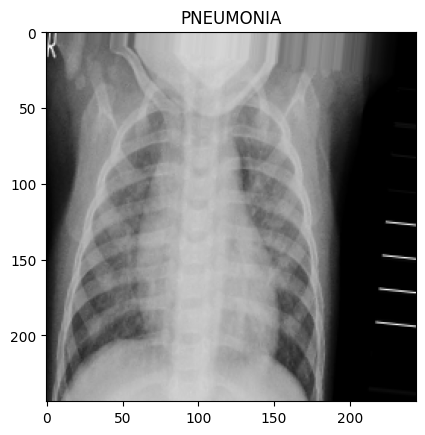

(32, 244, 244, 3)


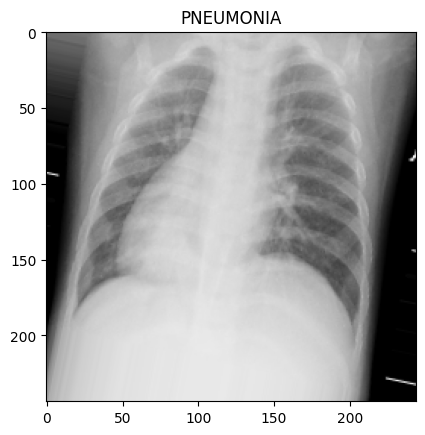

(32, 244, 244, 3)


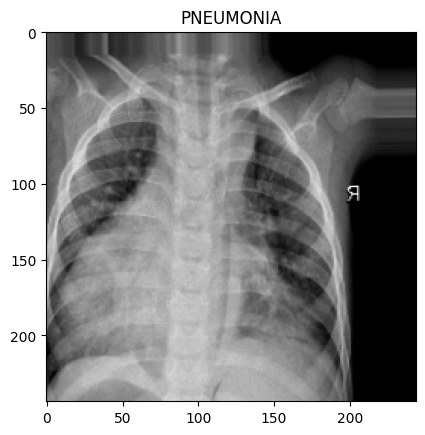

(32, 244, 244, 3)


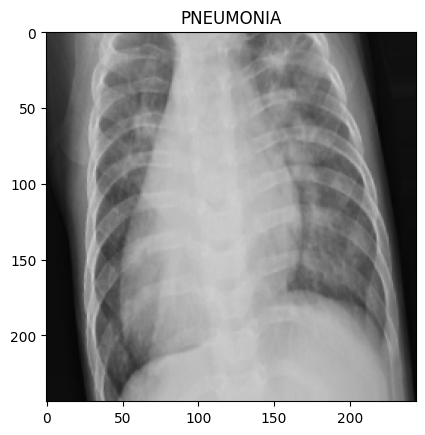

(32, 244, 244, 3)


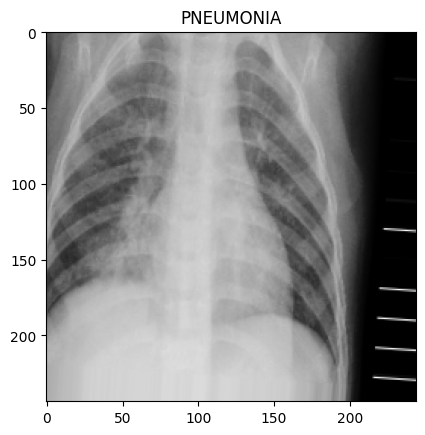

In [25]:
import matplotlib.pyplot as plt
import numpy as np

classes = ['COVID19', 'Normal', 'PNEUMONIA', 'TB']

for _ in range(5):
  img, label = next(train_dataset)
  print(img.shape)
  plt.title(classes[np.argmax(label[0])])
  plt.imshow(img[0])
  plt.show()


In [19]:
train_dataset.image_shape

(244, 244, 3)

CNN Model

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Model instance
CNN_model = Sequential()

# Convolution Layers
CNN_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNN_model.add(layers.BatchNormalization())
CNN_model.add(layers.MaxPooling2D(2, 2))

CNN_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNN_model.add(layers.BatchNormalization())
CNN_model.add(layers.MaxPooling2D(2, 2))

CNN_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
CNN_model.add(layers.BatchNormalization())
CNN_model.add(layers.MaxPooling2D(2, 2))

# Flatten
CNN_model.add(layers.Flatten())

# Node Layer
CNN_model.add(layers.Dense(128, activation='relu'))

# Dropout to prevent overfitting
CNN_model.add(layers.Dropout(0.5))

# Output Layer
CNN_model.add(layers.Dense(4, activation='softmax'))

# Compile the model
CNN_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy']
)


# Print model summary
CNN_model.summary()




Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Save best model
weight_path = "../models_and_weights/UHealth.weights.h5"

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    filepath = weight_path,
    save_best_only = True,
    save_weights_only = True,
    mode = 'max',
    monitor = 'val_accuracy'
)

In [35]:
# Fit data
history = CNN_model.fit(
    train_dataset,
    epochs=10,
    validation_data=val_dataset,
    class_weight=class_weights_dict,
    callbacks=[model_checkpoint, early_stop]
)

CNN_model.save('../models_and_weights/UHealth_model.keras')

Epoch 1/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.6476 - loss: 13.7331 - val_accuracy: 0.3947 - val_loss: 15.5436
Epoch 2/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 238s 1s/step - accuracy: 0.6956 - loss: 5.2960 - val_accuracy: 0.6053 - val_loss: 6.7096
Epoch 3/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 245s 1s/step - accuracy: 0.7235 - loss: 2.0424 - val_accuracy: 0.4211 - val_loss: 7.5792
Epoch 4/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.7046 - loss: 1.4494 - val_accuracy: 0.2895 - val_loss: 52.4606
Epoch 5/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 233s 1s/step - accuracy: 0.6907 - loss: 1.5166 - val_accuracy: 0.6842 - val_loss: 1.1467
Epoch 6/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 227s 1s/step - accuracy: 0.7589 - loss: 0.8453 - val_accuracy: 0.6579 - val_loss: 1.6553
Epoch 7/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 241s 1s/step - accuracy: 0.7313 - loss: 0.9893 - val_accuracy: 0.6579 - val_loss: 0.7885
Epoch 8/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 238s 1s/step - accuracy: 0.7588 - loss: 0.6447 - val_a

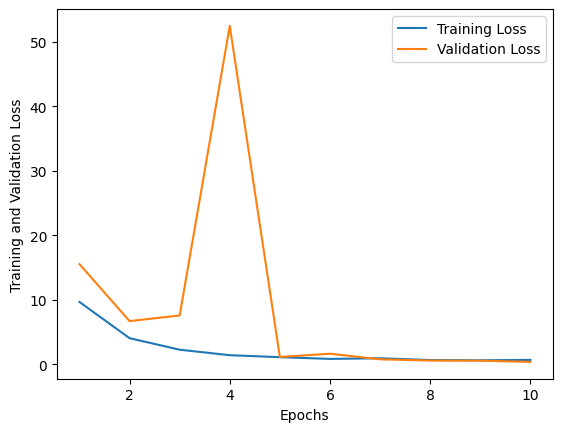

In [36]:
# Plot history
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = len(history.history['loss'])
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Training and Validation Loss")
plt.legend()
plt.show()

In [42]:
# Evaluate
CNN_model.evaluate(test_dataset, return_dict=True)

25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 201ms/step - accuracy: 0.7722 - loss: 0.6648


{'accuracy': 0.69520103931427, 'loss': 0.740717887878418}